# Introdução

Fonte: https://www.kaggle.com/datasets/colearninglounge/predicting-pulsar-starintermediate

## Descrição das colunas

*Trecho traduzido* - Cada candidato é descrito por 8 variáveis ​​contínuas e uma única variável de classe. As quatro primeiras são estatísticas simples obtidas do perfil de pulso integrado (perfil dobrado). Esta é uma matriz de variáveis ​​contínuas que descrevem uma versão do sinal resolvida em longitude que foi calculada a média em tempo e frequência. As quatro variáveis ​​restantes são obtidas de forma semelhante a partir da curva DM-SNR. Estes são resumidos abaixo:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

## Comentários Iniciais

O dataset fornecido pelo professor já veio com o procedo de *Feature Engineering* executado

# Bicliotecas e Funções

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns # wrapper library for visualization
import matplotlib.pyplot as plt # library for data visualization
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Código

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/KValim/Projetcs/main/FIAP/deep%20learning%20I/pulsar_star/pulsar_stars.csv')
df

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0
...,...,...,...,...,...,...,...,...,...
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0


In [3]:
df.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


## Correlação

[Text(0.5, 0, ' Mean of the integrated profile'),
 Text(1.5, 0, ' Standard deviation of the integrated profile'),
 Text(2.5, 0, ' Excess kurtosis of the integrated profile'),
 Text(3.5, 0, ' Skewness of the integrated profile'),
 Text(4.5, 0, ' Mean of the DM-SNR curve'),
 Text(5.5, 0, ' Standard deviation of the DM-SNR curve'),
 Text(6.5, 0, ' Excess kurtosis of the DM-SNR curve'),
 Text(7.5, 0, ' Skewness of the DM-SNR curve'),
 Text(8.5, 0, 'target_class')]

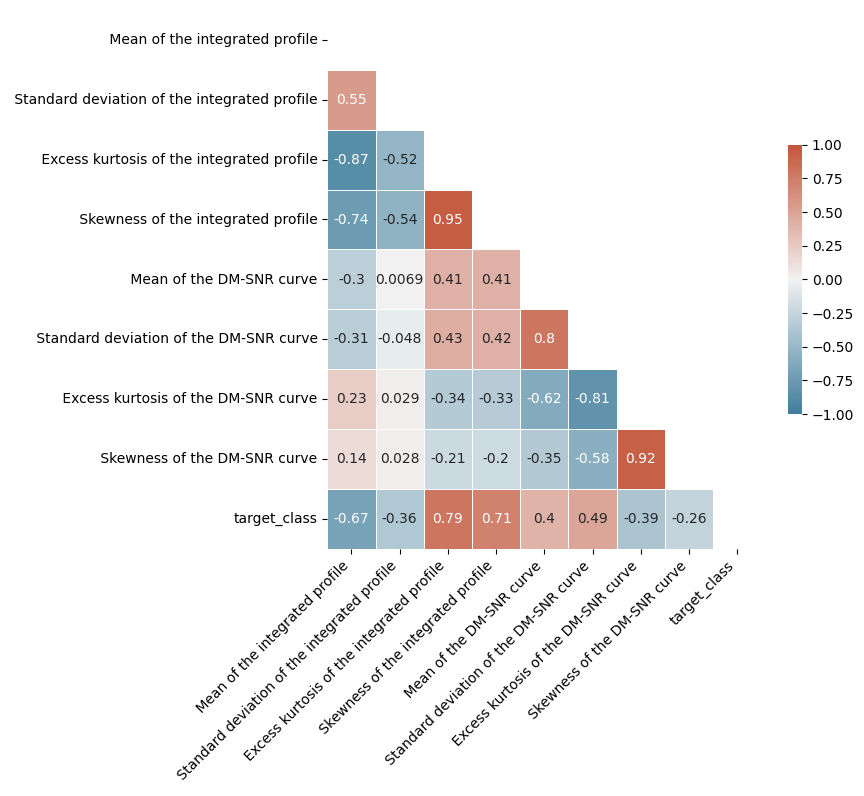

In [5]:
import numpy as np
# Generate a mask for the upper triangle
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.figure(figsize = (7, 7))
corr_mat = df.corr()
ax = sns.heatmap(corr_mat, 
                 vmin=-1, vmax=1, center=0, 
                 xticklabels = corr_mat.columns, 
                 yticklabels = corr_mat.columns, 
                 annot=True,
                 cmap=cmap,
                 linewidths=.5,
                 mask=mask,
                 cbar_kws={"shrink": .5})

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

Exces kurtosis of the integrated profile e Mean of the integrated profile tem, respectivamente, baixa e alta correlação com a variável target_class

In [6]:
# Since all dtypes are float or int, no categorical features
continous_features = list(set(df.columns) - set(['target_class']))
continous_features.sort()
continous_features

[' Excess kurtosis of the DM-SNR curve',
 ' Excess kurtosis of the integrated profile',
 ' Mean of the DM-SNR curve',
 ' Mean of the integrated profile',
 ' Skewness of the DM-SNR curve',
 ' Skewness of the integrated profile',
 ' Standard deviation of the DM-SNR curve',
 ' Standard deviation of the integrated profile']

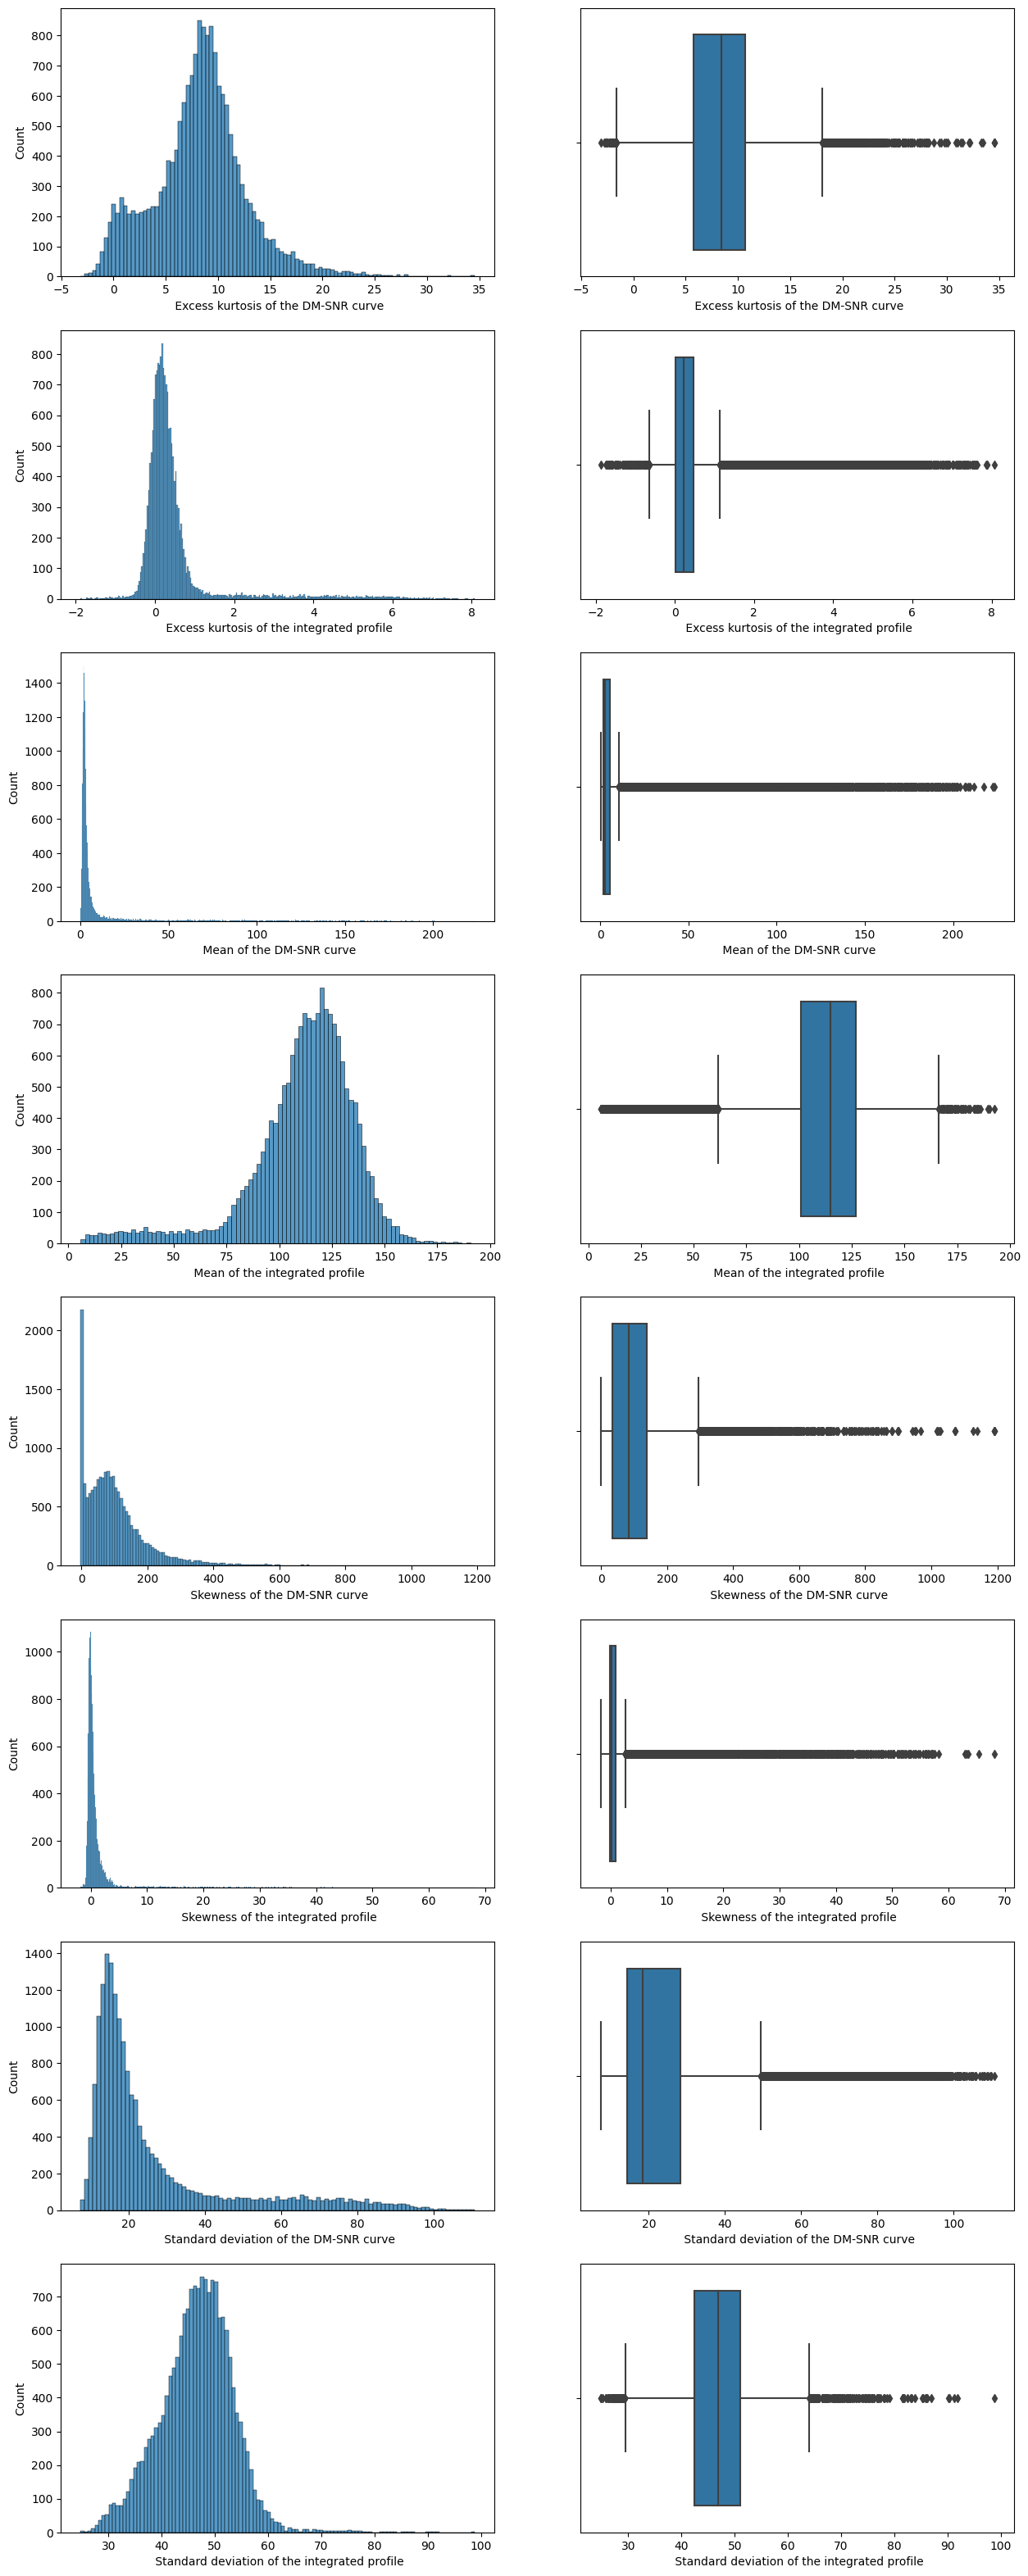

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

<Figure size 500x500 with 0 Axes>

In [7]:
fig, axes = plt.subplots(nrows=len(continous_features),ncols=2,  figsize=(15, 40))
for i in range(len(continous_features)):
    feature = continous_features[i]
    plt.figure(figsize = (5, 5))
    data=df.copy()
    sns.histplot(x=data[feature].dropna(), ax=axes[i][0])
    sns.boxplot(x=data[feature].dropna(), ax=axes[i][1])

(-200.0, 1300.0)

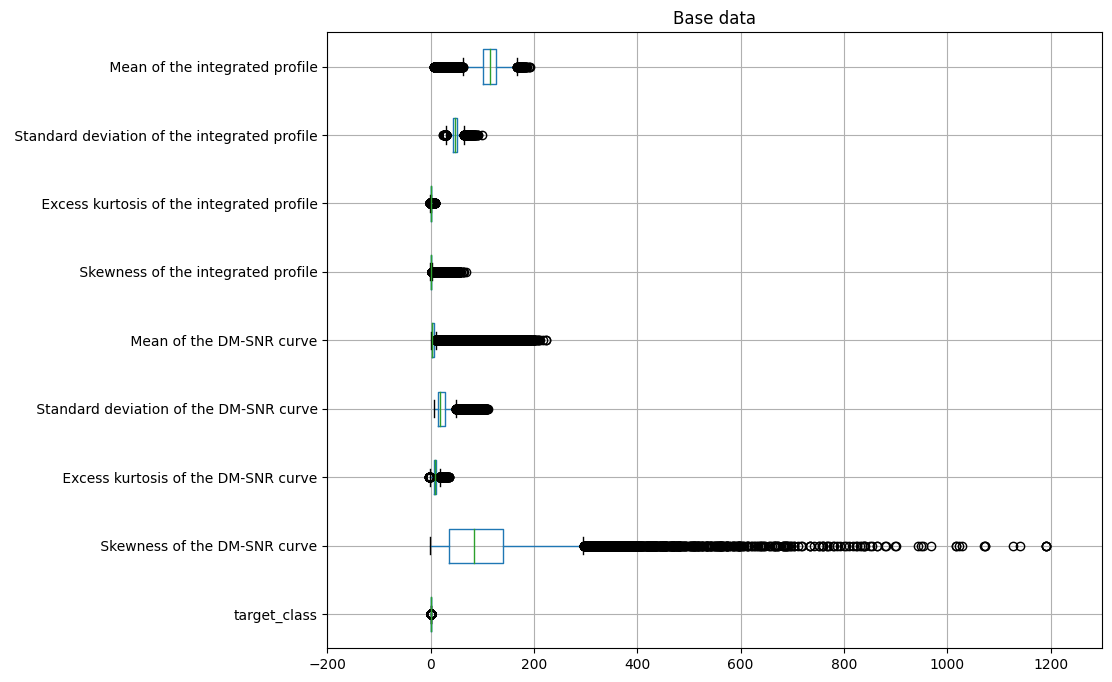

In [8]:
cols = list(df.columns)
cols.reverse()

plt.figure(figsize=(10,8))
plt.title('Base data')
df.boxplot(vert=0, column=cols)
plt.xlim(-200, 1300)

## Split Train Test

split it into training and testing sets

In [9]:
# split the data into features and target
X = df.drop("target_class", axis=1)
y = df["target_class"]


In [10]:
# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We will then standardize the data using StandardScaler

In [11]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
epochs = 100

## Modelo 0

In [29]:
# build the model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(8,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 32)                288       
                                                                 
 dense_6 (Dense)             (None, 32)                1056      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [31]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

This code loads the data from a CSV file, splits it into training and test sets, standardizes the data (to center it around 0 and scale the features to have a unit variance), defines a neural network with two hidden layers and an output layer, compiles the model with appropriate loss function and optimizer, then trains the model with the training data and validating on the test data with 100 iteration.

You should also consider adding callbacks like ModelCheckpoint, EarlyStopping to handle overfitting and achieve better results.

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
181/224 [=======================>......] - ETA: 0s - loss: 0.1639 - accuracy: 0.9705
Epoch 1: val_loss improved from inf to 0.07851, saving model to model.h5
224/224 [==============================] - 1s 2ms/step - loss: 0.1480 - accuracy: 0.9721 - val_loss: 0.0785 - val_accuracy: 0.9782
Epoch 2/100
181/224 [=======================>......] - ETA: 0s - loss: 0.0838 - accuracy: 0.9767
Epoch 2: val_loss improved from 0.07851 to 0.07260, saving model to model.h5
224/224 [==============================] - 0s 1ms/step - loss: 0.0784 - accuracy: 0.9776 - val_loss: 0.0726 - val_accuracy: 0.9788
Epoch 3/100
166/224 [=====================>........] - ETA: 0s - loss: 0.0766 - accuracy: 0.9776
Epoch 3: val_loss improved from 0.07260 to 0.06881, saving model to model.h5
224/224 [==============================] - 0s 1ms/step - loss: 0.0745 - accuracy: 0.9781 - val_loss: 0.0688 - val_accuracy: 0.9799
Epoch 4/100
180/224 [=======================>......] - ETA: 0s - loss: 0.0703 - accuracy:

In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 0s 543us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.92      0.87      0.89       321

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



ModelCheckpoint callback is used to save the model with the best performance during training, based on a certain metric such as validation loss or accuracy. It will save only the best model with the filepath='model.h5' name and it will only save the best version by using save_best_only=True and the verbose=1 show some message during the training time

EarlyStopping callback is used to stop training early when the model stops improving, based on a certain metric such as validation loss or accuracy, patience=10 means if the model didn’t improve after 10 epochs, then training will be stopped.

These callbacks can help prevent overfitting and save computational resources by stopping training early when performance on a validation set stops improving.

### Resumo

1. Import necessary libraries such as numpy, pandas, sklearn and tensorflow.

2. Load the data from a CSV file using pandas and split it into features and target.

3. Split the data into training and test sets using the train_test_split function from scikit-learn.

4. Standardize the data using StandardScaler from scikit-learn.

5. Define a neural network model using the Keras Sequential API. The model has two hidden layers with 32 units each and relu activation functions, and an output layer with one unit and a sigmoid activation function.

6. Compile the model with Adam optimizer and binary crossentropy loss function and accuracy as metrics

7. Train the model using the training data and validate it on the test data with 100 iteration, also added two callbacks, ModelCheckpoint and EarlyStopping to handle overfitting and achieve better results

8. Load the model using keras.models.load_model("model.h5") function

9. Use the loaded model to make predictions on new data, evaluate its performance on a test set, or continue training it further.

10. Scale new data using the same scaler object and use the predict() or predict_classes() method to get the predicted label or class respectively.

### Melhorias

1. Collect more data: A larger and more diverse training set can help the model generalize better and improve its performance.

2. Feature Engineering: You can try to extract more meaningful features from the data, or combine existing features in new ways to improve the model's ability to learn from the data.

3. Try different architectures and hyperparameters: You can experiment with different neural network architectures and different hyperparameters such as the number of layers, number of units in each layer, activation functions and so on. This can be done using GridSearchCV, RandomSearchCV from sklearn.

4. Regularization: Regularization techniques like dropout, L1, L2 can help to prevent overfitting and improve the generalization of the model.

5. Data augmentation: This can help the model to learn new features from the same data by applying random transformations, rotations, and so on.

6. Transfer Learning: You can use a pre-trained model and fine-tune it on your dataset to leverage knowledge from similar tasks.

7. Ensemble methods: It is a technique where multiple models are used to solve a single problem, such as bagging, boosting, and stacking. This can improve the overall performance of the model by reducing overfitting and variance.

Keep in mind that different techniques will be more or less effective depending on the specific dataset and problem you are working on. The best way to improve performance is to experiment with different techniques and see what works best for your specific use case.

### GridSearchCV

GridSearchCV to search for the best neural network architecture and hyperparameters for your dataset:

In [34]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import ModelCheckpoint, EarlyStopping

# define the model
def create_model(num_layers=1, num_units=32, activation='relu'):
    model = Sequential()
    for _ in range(num_layers):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# create the wrapper
model_wrapper = KerasClassifier(build_fn=create_model, epochs=1, batch_size=32, verbose=0)

# define the grid search parameters
params = {'num_layers': [1, 2], 'num_units': [8, 16, 32], 'activation': ['relu', 'tanh', 'sigmoid']}

# create the grid search
grid = GridSearchCV(estimator=model_wrapper, param_grid=params, cv=5, n_jobs=-1, error_score='raise')

# define callbacks
# import os
# filepath = os.path.join("models", "model_{epoch}_{val_loss}_{accuracy}.h5")
# checkpointer = ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True, save_weights_only=False, mode='min', save_freq='epoch')

earlystopper = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
callbacks = [earlystopper]

# fit the grid search
grid_result = grid.fit(X_train, y_train, validation_data=(X_test, y_test), callbacks=callbacks)

# summarize the results
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')


C:\Users\KAIQUEHENRIQUEVALIM\AppData\Local\Temp\ipykernel_4344\986252779.py:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model_wrapper = KerasClassifier(build_fn=create_model, epochs=1, batch_size=32, verbose=0)


Best: 0.9781157493591308 using {'activation': 'tanh', 'num_layers': 2, 'num_units': 32}


In [35]:
y_pred = grid_result.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 0s 588us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.92      0.84      0.88       321

    accuracy                           0.98      3580
   macro avg       0.95      0.92      0.93      3580
weighted avg       0.98      0.98      0.98      3580



This will save the best model during the grid search process using the ModelCheckpoint callback and it will stop training early when the model stops improving using the EarlyStopping callback.

The fit method of the KerasClassifier wrapper will automatically call the fit method of the underlying model with the appropriate training and validation data for each fold of cross-validation, including any callbacks that are passed to it. This allows the callbacks to be used during the grid search process, so that you can save the best performing model and stop the training early in an automated way.

By doing this, you will have access to the best model even after the GridSearchCV has finished its execution and you can use it for further predictions.

This code uses the GridSearchCV function to search for the best combination of hyperparameters for the create_model function, which is a neural network with the specified number of layers, number of units in each layer, and activation function. GridSearchCV will train and evaluate the model on the training data using k-fold cross-validation, with k=5, and will return the combination of hyperparameters that performed best on the validation set.
The GridSearchCV function uses the KerasClassifier wrapper to allow the use of Keras models with scikit-learn's API, n_jobs=-1 is used to use all the available CPU cores to parallelize the computation.

Please note that this code is just an example to give an idea of how GridSearchCV can be used. You should adjust the parameter grid and the neural network architecture to suit your specific dataset and problem. Also keep in mind that this can be a computationally expensive process and might take a long time to run, and that using RandomSearchCV is a good alternative as it perform better on large scale problems.

Here, we defined a parameter grid that includes different numbers of hidden layers, batch size, epochs and optimizer. The GridSearchCV object is then created with the specified parameter grid, and the data is fit to the model using the fit() method.

It will perform an exhaustive search over the specified parameter grid. And for each combination of parameters, it will train the model using k-fold cross-validation (in this case k=3) and then it will output the best parameters and the best score(accuracy or loss)

It's worth noting that GridSearchCV can be computationally expensive, especially when the number of combination of hyperparameters increases, another alternative is RandomizedSearchCV that samples a given number of random combinations of hyperparameters, it's less computational expensive but it's less likely to find the optimal combination of hyperparameters.

## Modelo 1

Next, we will build our MLP neural network using Keras. We will start by defining the model as a Sequential model, and then adding two hidden layers with 64 and 32 units respectively

In [36]:
# Define the model
model = Sequential()

# Add the hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))

Finally, we will add the output layer with a sigmoid activation function, and compile the model using the Adam optimizer and binary crossentropy loss

In [37]:
# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [38]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 64)                576       
                                                                 
 dense_12 (Dense)            (None, 32)                2080      
                                                                 
 dense_13 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


To train the model, we will use the fit method, passing in our training data and labels, and specifying the number of epochs and the batch size

In [39]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=64, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
189/224 [========================>.....] - ETA: 0s - loss: 0.1557 - accuracy: 0.9699
Epoch 1: val_loss improved from inf to 0.07155, saving model to model.h5
224/224 [==============================] - 1s 2ms/step - loss: 0.1433 - accuracy: 0.9709 - val_loss: 0.0715 - val_accuracy: 0.9791
Epoch 2/100
169/224 [=====================>........] - ETA: 0s - loss: 0.0789 - accuracy: 0.9765
Epoch 2: val_loss improved from 0.07155 to 0.06805, saving model to model.h5
224/224 [==============================] - 0s 1ms/step - loss: 0.0748 - accuracy: 0.9778 - val_loss: 0.0681 - val_accuracy: 0.9802
Epoch 3/100
183/224 [=======================>......] - ETA: 0s - loss: 0.0743 - accuracy: 0.9776
Epoch 3: val_loss improved from 0.06805 to 0.06653, saving model to model.h5
224/224 [==============================] - 0s 1ms/step - loss: 0.0725 - accuracy: 0.9780 - val_loss: 0.0665 - val_accuracy: 0.9802
Epoch 4/100
179/224 [======================>.......] - ETA: 0s - loss: 0.0701 - accuracy:

In [40]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 0s 550us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.91      0.88      0.90       321

    accuracy                           0.98      3580
   macro avg       0.95      0.94      0.94      3580
weighted avg       0.98      0.98      0.98      3580



Finally, we can evaluate the model on the testing data using the evaluate method

This should give us a full code for classifying healthy or not healthy using an MLP neural network on the UCI Heart Disease dataset

## Modelo 2
A recurrent neural network (RNN) with one LSTM layer

In [41]:
from tensorflow.keras.layers import LSTM

# Define the model
model = Sequential()

# Add the LSTM layer
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1)))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
 dense_14 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,385
Trainable params: 4,385
Non-trainable params: 0
_________________________________________________________________


In [43]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
443/448 [============================>.] - ETA: 0s - loss: 0.1969 - accuracy: 0.9472
Epoch 1: val_loss improved from inf to 0.09218, saving model to model.h5
448/448 [==============================] - 3s 3ms/step - loss: 0.1963 - accuracy: 0.9473 - val_loss: 0.0922 - val_accuracy: 0.9707
Epoch 2/100
442/448 [============================>.] - ETA: 0s - loss: 0.0827 - accuracy: 0.9761
Epoch 2: val_loss improved from 0.09218 to 0.08019, saving model to model.h5
448/448 [==============================] - 1s 3ms/step - loss: 0.0831 - accuracy: 0.9760 - val_loss: 0.0802 - val_accuracy: 0.9777
Epoch 3/100
430/448 [===========================>..] - ETA: 0s - loss: 0.0798 - accuracy: 0.9782
Epoch 3: val_loss improved from 0.08019 to 0.07851, saving model to model.h5
448/448 [==============================] - 1s 3ms/step - loss: 0.0786 - accuracy: 0.9783 - val_loss: 0.0785 - val_accuracy: 0.9768
Epoch 4/100
431/448 [===========================>..] - ETA: 0s - loss: 0.0771 - accuracy:

In [44]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.92      0.87      0.90       321

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



## Modelo 3
A hybrid neural network with one convolutional layer and one LSTM layer

In [45]:
from tensorflow.keras.layers import Conv1D, LSTM

# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=32))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [46]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 6, 32)             128       
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 8,481
Trainable params: 8,481
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
445/448 [============================>.] - ETA: 0s - loss: 0.1329 - accuracy: 0.9603
Epoch 1: val_loss improved from inf to 0.07266, saving model to model.h5
448/448 [==============================] - 3s 5ms/step - loss: 0.1327 - accuracy: 0.9604 - val_loss: 0.0727 - val_accuracy: 0.9788
Epoch 2/100
431/448 [===========================>..] - ETA: 0s - loss: 0.0751 - accuracy: 0.9791
Epoch 2: val_loss improved from 0.07266 to 0.07192, saving model to model.h5
448/448 [==============================] - 1s 2ms/step - loss: 0.0759 - accuracy: 0.9793 - val_loss: 0.0719 - val_accuracy: 0.9807
Epoch 3/100
427/448 [===========================>..] - ETA: 0s - loss: 0.0720 - accuracy: 0.9788
Epoch 3: val_loss improved from 0.07192 to 0.06723, saving model to model.h5
448/448 [==============================] - 1s 2ms/step - loss: 0.0724 - accuracy: 0.9787 - val_loss: 0.0672 - val_accuracy: 0.9802
Epoch 4/100
446/448 [============================>.] - ETA: 0s - loss: 0.0712 - accuracy:

In [ ]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

## Modelo 4
A deep neural network (DNN) with three hidden layers

In [48]:
# Define the model
model = Sequential()

# Add the hidden layers
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [49]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
446/448 [============================>.] - ETA: 0s - loss: 0.1126 - accuracy: 0.9733
Epoch 1: val_loss improved from inf to 0.06826, saving model to model.h5
448/448 [==============================] - 1s 2ms/step - loss: 0.1123 - accuracy: 0.9734 - val_loss: 0.0683 - val_accuracy: 0.9804
Epoch 2/100
421/448 [===========================>..] - ETA: 0s - loss: 0.0724 - accuracy: 0.9789
Epoch 2: val_loss improved from 0.06826 to 0.06638, saving model to model.h5
448/448 [==============================] - 0s 1ms/step - loss: 0.0726 - accuracy: 0.9791 - val_loss: 0.0664 - val_accuracy: 0.9804
Epoch 3/100
413/448 [==========================>...] - ETA: 0s - loss: 0.0695 - accuracy: 0.9799
Epoch 3: val_loss improved from 0.06638 to 0.06371, saving model to model.h5
448/448 [==============================] - 0s 1ms/step - loss: 0.0700 - accuracy: 0.9797 - val_loss: 0.0637 - val_accuracy: 0.9810
Epoch 4/100
407/448 [==========================>...] - ETA: 0s - loss: 0.0675 - accuracy:

In [50]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 0s 581us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3259
           1       0.94      0.83      0.88       321

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



## Modelo 5
A recurrent neural network (RNN) with two LSTM layers:

In [51]:
from tensorflow.keras.layers import LSTM

# Define the model
model = Sequential()

# Add the LSTM layers
model.add(LSTM(units=32, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(LSTM(units=32))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [52]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
447/448 [============================>.] - ETA: 0s - loss: 0.1499 - accuracy: 0.9590
Epoch 1: val_loss improved from inf to 0.08330, saving model to model.h5
448/448 [==============================] - 5s 6ms/step - loss: 0.1498 - accuracy: 0.9590 - val_loss: 0.0833 - val_accuracy: 0.9771
Epoch 2/100
445/448 [============================>.] - ETA: 0s - loss: 0.0861 - accuracy: 0.9740
Epoch 2: val_loss improved from 0.08330 to 0.08197, saving model to model.h5
448/448 [==============================] - 2s 4ms/step - loss: 0.0857 - accuracy: 0.9742 - val_loss: 0.0820 - val_accuracy: 0.9774
Epoch 3/100
435/448 [============================>.] - ETA: 0s - loss: 0.0803 - accuracy: 0.9769
Epoch 3: val_loss improved from 0.08197 to 0.07555, saving model to model.h5
448/448 [==============================] - 2s 4ms/step - loss: 0.0807 - accuracy: 0.9768 - val_loss: 0.0755 - val_accuracy: 0.9791
Epoch 4/100
441/448 [============================>.] - ETA: 0s - loss: 0.0785 - accuracy:

In [53]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.94      0.86      0.90       321

    accuracy                           0.98      3580
   macro avg       0.96      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580



##  Modelo 6
A hybrid neural network with one convolutional layer, one LSTM layer, and one dense layer

In [54]:
from tensorflow.keras.layers import Conv1D, LSTM, Dense

# Define the model
model = Sequential()

# Add the convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=32))

# Add the dense layer
model.add(Dense(units=16, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [55]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# add callbacks
checkpointer = ModelCheckpoint(filepath='model.h5', save_best_only=True, verbose=1)
earlystopper = EarlyStopping(patience=10)

callbacks = [checkpointer, earlystopper]

# train the model
model.fit(X_train, y_train, epochs=epochs, batch_size=32, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/100
433/448 [===========================>..] - ETA: 0s - loss: 0.1451 - accuracy: 0.9606
Epoch 1: val_loss improved from inf to 0.06916, saving model to model.h5
448/448 [==============================] - 3s 4ms/step - loss: 0.1443 - accuracy: 0.9608 - val_loss: 0.0692 - val_accuracy: 0.9804
Epoch 2/100
444/448 [============================>.] - ETA: 0s - loss: 0.0733 - accuracy: 0.9790
Epoch 2: val_loss improved from 0.06916 to 0.06760, saving model to model.h5
448/448 [==============================] - 1s 3ms/step - loss: 0.0736 - accuracy: 0.9788 - val_loss: 0.0676 - val_accuracy: 0.9802
Epoch 3/100
441/448 [============================>.] - ETA: 0s - loss: 0.0721 - accuracy: 0.9794
Epoch 3: val_loss did not improve from 0.06760
448/448 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9794 - val_loss: 0.0681 - val_accuracy: 0.9802
Epoch 4/100
441/448 [============================>.] - ETA: 0s - loss: 0.0719 - accuracy: 0.9790
Epoch 4: val_loss impr

In [56]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred.round()))

112/112 [==============================] - 0s 960us/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3259
           1       0.91      0.87      0.89       321

    accuracy                           0.98      3580
   macro avg       0.95      0.93      0.94      3580
weighted avg       0.98      0.98      0.98      3580

